# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 6: APIs + Random Forests

## Overview

This week, we're learning about ensemble methods, APIs, and natural language processing. Now we're going to put these skills to the test!

You've been hired by Netflix to examine what factors lead to certain ratings for movies. Given that Netflix does not currently store this type of data, your boss has suggested that you collect ratings and reviews data from IMDB. Netflix is no stranger to machine learning, however:

- Netflix uses random forests and decision trees to predict what types of movies an individual user may like.
- Using unsupervised learning techniques, they are able to continually update suggestions, listings, and other features of its user interface.
- Netflix, however, hasn't focused on collecting data on the top movies of all time, and would like to add some of them to their offerings based on popularity and other factors.

**Point:** Your boss isn't sure where to start on this project, so your task is to collect the data, build a random forest, and examine its feature importances to understand what factors contribute to ratings.


## Project Summary
Acquire data from IMDB, and use whatever metrics you can collect to predict whether a movie is highly rated.

When you've finished your analysis, Netflix would like a report detailing your findings, with recommendations as to next steps.

Here are some questions to keep in mind:

- What factors are the most direct predictors of rating?
- You can use rating as your target variable. But it's up to you whether to treat it as continuous, binary, or multiclass.

**Goal**: Completed Jupyter notebook that includes modeling using a random forest and an blog post explaining your findings.

---

## Requirements
This is deliberately open ended. There is no starter code. It's up to you how to acquire the data, store the data, and what features you want to use. 

We expect you to use a **tree-based model**, but the rest of the decisions are up to you. 

We will be looking for the following things:
 - A clear problem statement & description of the goals of your study to be included in the final report
 - Data from IMDB
 - Cleaned and refined data
 - Visualization. Plots that describe your data and evaluate your model.
 - Tree-based models (use any combination of ensemble techniques: random forests, bagging, boosting). 
 - A blog post presenting the results of your findings as a report to Netflix, including:
  - a problem statement,
  - summary statistics of the various factors (e.g. year, number of ratings, etc.),
  - your model,
  - at least 2 graphics,
  - and your recommendations for next steps!



## Necessary Deliverables / Submission

- Materials must be in a clearly labeled Jupyter notebook
- Link to the blog post with your report in your Jupyter notebook
- Materials must be submitted to GitHub by Wednesday morning of Week 7.

---

## Suggested Ways to Get Started

- You can get data on the top 250 movies on IMDB using the [IMBDpie API](https://github.com/richardasaurus/imdb-pie) 
- If you need additional data, you can either research additional APIs, or scrape it yourself using BeautifulSoup
- Read the docs for whatever technologies you use. Most of the time, there is a tutorial that you can follow, but not always, and learning to read documentation is crucial to your success!
- Document **everything**.

### Useful Resources

[Documentation for BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

---

### Project Feedback + Evaluation

[Attached here is a complete rubric for this project.](./project-06-rubric.md)

Your instructors will score each of your technical requirements using the scale below:

    Score | Expectations
    ----- | ------------
    **0** | _Incomplete._
    **1** | _Does not meet expectations._
    **2** | _Meets expectations, good job!_
    **3** | _Exceeds expectations, you wonderful creature, you!_

 This will serve as a helpful overall gauge of whether you met the project goals, but __the more important scores are the individual ones__ above, which can help you identify where to focus your efforts for the next project!

In [345]:
import json
import urllib
import requests
import json
import re
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
import datetime
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score

%matplotlib inline

IMDb uses a Bayesian estimate along with other parameters to calculate ratings of movies for Top 250 rankings. The formula used is:

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C 
where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed in the Top 250 (currently 25000)

C = the mean vote across the whole report (currently around 7)

# Acquiring Data

Risks and Assumptions:

1) We're pulling the top 250 movies, which naturally will have some selection bias associated with it. We're going to ignore that for now. 

2) Some values were missing and had to be imputed.

3) IMDb as a source is about as reliable as you can hope for, but there could be discrepencies in the data. e.g. the way you report 'Gross' has changed some over time.

4) There's a lot of multi-colinearity in the data. We're using recursive feature selection with each of our models to help account for some of that. 

In [61]:
def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    entries = re.findall("<a href.*?/title/(.*?)/", html)
    return list(set(entries))

In [62]:
entries = get_top_250()

In [63]:
def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [64]:
entries_dict_list = [get_entry(e) for e in entries]

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [65]:
df = pd.DataFrame(entries_dict_list)

In [66]:
def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/'+entry)
    html = response.text
    try:
        gross_list = re.findall("Gross:</h4>[ ]*\$([^ ]*)", html)
        gross = int(gross_list[0].replace(',', ''))
        print '.',
        return gross
    except Exception as ex:
        print
        print ex, entry, response.status_code
        return None

In [67]:
grosses = [(e, get_gross(e)) for e in entries]

. . . . . . .
list index out of range tt0046268 200

list index out of range tt0055630 200
. . . . .
list index out of range tt0057115 200
.
list index out of range tt0071315 200
. . . .
list index out of range tt0074896 200
. .
list index out of range tt0021749 200
. .
list index out of range tt0053125 200
. . .
list index out of range tt1220719 200

list index out of range tt0025316 200
. .
list index out of range tt0083922 200
. . .
list index out of range tt0072684 200
.
list index out of range tt0074958 200
. . . .
list index out of range tt0036775 200
. . . . . .
list index out of range tt0978762 200
. .
list index out of range tt0080678 200
. .
list index out of range tt0056592 200
.
list index out of range tt0095327 200
. . . . . . . . .
list index out of range tt0046438 200
.
list index out of range tt0015864 200
.
list index out of range tt0045152 200
. . . .
list index out of range tt0046911 200
.
list index out of range tt0050986 200
.
list index out of range tt0091251 200


In [68]:
df1 = pd.DataFrame(grosses, columns=['imdbID', 'Gross'])
df1.head()

,imdbID,Gross
0,tt2582802,13092000.0
1,tt0047478,269061.0
2,tt0082971,242374454.0
3,tt0050212,27200000.0
4,tt0848228,623279547.0


In [69]:
df = df.replace('N/A', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     169 non-null object
Plot          250 non-null object
Poster        248 non-null object
Rated         249 non-null object
Released      249 non-null object
Response      250 non-null object
Runtime       250 non-null object
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null object
imdbID        250 non-null object
imdbRating    250 non-null object
imdbVotes     250 non-null object
dtypes: object(20)
memory usage: 39.1+ KB


In [70]:
df.Released = pd.to_datetime(df.Released)

In [71]:
def intminutes(x):
    y = x.replace('min', '').strip()
    return int(y)

df.Runtime = df.Runtime.apply(intminutes)

In [72]:
df.Year = df.Year.astype(int)

In [73]:
df.imdbRating = df.imdbRating.astype(float)

In [74]:
def intvotes(x):
    y = x.replace(',', '').strip()
    return int(y)
df.imdbVotes = df.imdbVotes.apply(intvotes)

In [75]:
df = pd.merge(df, df1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 21 columns):
Actors        250 non-null object
Awards        246 non-null object
Country       250 non-null object
Director      250 non-null object
Genre         250 non-null object
Language      249 non-null object
Metascore     169 non-null object
Plot          250 non-null object
Poster        248 non-null object
Rated         249 non-null object
Released      249 non-null datetime64[ns]
Response      250 non-null object
Runtime       250 non-null int64
Title         250 non-null object
Type          250 non-null object
Writer        250 non-null object
Year          250 non-null int64
imdbID        250 non-null object
imdbRating    250 non-null float64
imdbVotes     250 non-null int64
Gross         184 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(15)
memory usage: 43.0+ KB


# Data Preparation

In [107]:
#Copy the dataframe. It can now be manipulated and if there's an error it won't require another API pull.
wdf = df

In [108]:
cv = CountVectorizer()
data = cv.fit_transform(wdf.Genre).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genredf = pd.DataFrame(data, columns=columns)
genredf.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [109]:
wdf = pd.concat([wdf, genredf], axis = 1)

In [110]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(wdf.Actors).todense()
columns = ['actor: '+c for c in cv.get_feature_names()]
actorsdf = pd.DataFrame(data, columns=columns)
actorsdf.head()

,actor: aamir khan,actor: aaron eckhart,actor: abdel ahmed,actor: adam baldwin,actor: adam driver,actor: adolphe menjou,actor: adrien brody,actor: agnes moorehead,actor: ahney her,actor: akemi yamaguchi,...,actor: woody harrelson,actor: xolani mali,actor: yacef saadi,actor: yoshiko shinohara,actor: yukiko shimazaki,actor: yves montand,actor: yôko tsukasa,actor: zach grenier,actor: zoe saldana,actor: álvaro guerrero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
wdf.Actors[0]

u'Miles Teller, J.K. Simmons, Paul Reiser, Melissa Benoist'

In [112]:
actorsdf.loc[0,actorsdf.iloc[0] != 0]

actor: j.k. simmons       1
actor: melissa benoist    1
actor: miles teller       1
actor: paul reiser        1
Name: 0, dtype: int64

In [113]:
wdf = pd.concat([wdf, actorsdf], axis = 1)

In [ ]:
#Vectorize Director

In [133]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(wdf.Director).todense()
columns = ['director: '+c for c in cv.get_feature_names()]
directorsdf = pd.DataFrame(data, columns=columns)
directorsdf.head()

,director: adam elliot,director: akira kurosawa,director: alan mak,director: alejandro g,director: alfred hitchcock,director: andrei tarkovsky,director: andrew stanton,director: anurag kashyap,director: asghar farhadi,director: ashutosh gowariker,...,director: vittorio de,director: von donnersmarck,director: wes anderson,director: william wyler,director: wilson yip,director: wim wenders,director: wolfgang petersen,director: woody allen,director: wook park,director: yasujirô ozu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
wdf.Director[0]

u'Damien Chazelle'

In [136]:
directorsdf.loc[0,directorsdf.iloc[0] != 0]

director: damien chazelle    1
Name: 0, dtype: int64

In [139]:
wdf = pd.concat([wdf, directorsdf], axis = 1)

In [ ]:
#Vectorize Country

In [140]:
cv = CountVectorizer()
data = cv.fit_transform(wdf.Country).todense()
columns = ['country_'+c for c in cv.get_feature_names()]
countrydf = pd.DataFrame(data, columns=columns)
countrydf.head()

,country_africa,country_algeria,country_arab,country_argentina,country_australia,country_austria,country_belgium,country_brazil,country_canada,country_china,...,country_spain,country_sweden,country_switzerland,country_taiwan,country_uk,country_union,country_united,country_usa,country_west,country_zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [141]:
wdf.Country[0]

u'USA'

In [142]:
countrydf.loc[0,countrydf.iloc[0] != 0]

country_usa    1
Name: 0, dtype: int64

In [143]:
wdf = pd.concat([wdf, countrydf], axis = 1)

In [ ]:
#Vectorize Writer

In [144]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(wdf.Writer).todense()
columns = ['writer_ '+c for c in cv.get_feature_names()]
writerdf = pd.DataFrame(data, columns=columns)
writerdf.head()

,writer_ a magazine,writer_ a mockingbird,writer_ a slave,writer_ a story,writer_ a study,writer_ a.b. jawdat,writer_ a.b. rahman,writer_ a.l. craig,writer_ a.l. diamond,writer_ aaron guzikowski,...,writer_ winston groom,writer_ wladyslaw szpilman,writer_ wolfgang petersen,writer_ woody allen,writer_ wook park,writer_ written for,writer_ yasujirô ozu,writer_ yun hwang,writer_ zak penn,writer_ zeishan quadri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [145]:
wdf = pd.concat([wdf, writerdf], axis = 1)

In [147]:
wdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 1005 columns):
Actors                            object
Awards                            object
Country                           object
Director                          object
Genre                             object
Language                          object
Metascore                         object
Rated                             object
Released                          datetime64[ns]
Runtime                           int64
Title                             object
Type                              object
Writer                            object
Year                              int64
imdbID                            object
imdbRating                        float64
imdbVotes                         int64
Gross                             float64
actor: al pacino                  int64
actor: alec guinness              int64
actor: ben kingsley               int64
actor: brad pitt            

In [ ]:
# Dummy the Month the movie was released.

In [155]:
wdf['month'] = wdf['Released'].dt.month

In [160]:
df_month = pd.get_dummies(wdf['month'], prefix='month', drop_first=True)
wdf = pd.concat([wdf,df_month], axis=1)
wdf.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Rated,Released,Runtime,...,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,month_10.0,month_11.0,month_12.0
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,R,2014-10-15,107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,UNRATED,1956-11-19,207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,PG,1981-06-12,115,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",NaN,PG,1957-12-14,161,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,Joss Whedon,"Action, Sci-Fi, Thriller","English, Russian",69,PG-13,2012-05-04,143,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Make the Ratings into Dummies


In [161]:
wdf['Rated'].value_counts()

R            106
PG            37
PG-13         33
NOT RATED     28
APPROVED      18
G             13
UNRATED        9
PASSED         4
M              1
Name: Rated, dtype: int64

In [162]:
df_ratings = pd.get_dummies(wdf['Rated'], prefix='month', drop_first=True)
wdf = pd.concat([wdf,df_ratings], axis=1)
wdf.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Rated,Released,Runtime,...,month_11.0,month_12.0,month_G,month_M,month_NOT RATED,month_PASSED,month_PG,month_PG-13,month_R,month_UNRATED
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,R,2014-10-15,107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,UNRATED,1956-11-19,207,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,PG,1981-06-12,115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",NaN,PG,1957-12-14,161,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,Joss Whedon,"Action, Sci-Fi, Thriller","English, Russian",69,PG-13,2012-05-04,143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [114]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Columns: 893 entries, Actors to actor: álvaro guerrero
dtypes: datetime64[ns](1), float64(2), int64(878), object(12)
memory usage: 1.7+ MB


In [120]:
#Remove columns that sum to 1 or less. Code from stackoverflow.
#wdf.drop([col for col, val in wdf.sum().iteritems() if val < 2], axis=1, inplace=True)

In [122]:
wdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 193 columns):
Actors                          object
Awards                          object
Country                         object
Director                        object
Genre                           object
Language                        object
Metascore                       object
Rated                           object
Released                        datetime64[ns]
Runtime                         int64
Title                           object
Type                            object
Writer                          object
Year                            int64
imdbID                          object
imdbRating                      float64
imdbVotes                       int64
Gross                           float64
actor: al pacino                int64
actor: alec guinness            int64
actor: ben kingsley             int64
actor: brad pitt                int64
actor: bruce willis             i

In [163]:
wdf.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Rated,Released,Runtime,...,month_11.0,month_12.0,month_G,month_M,month_NOT RATED,month_PASSED,month_PG,month_PG-13,month_R,month_UNRATED
0,"Miles Teller, J.K. Simmons, Paul Reiser, Melis...",Won 3 Oscars. Another 87 wins & 131 nominations.,USA,Damien Chazelle,"Drama, Music",English,88,R,2014-10-15,107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",Nominated for 2 Oscars. Another 5 wins & 6 nom...,Japan,Akira Kurosawa,"Action, Adventure, Drama",Japanese,98,UNRATED,1956-11-19,207,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"Harrison Ford, Karen Allen, Paul Freeman, Rona...",Won 4 Oscars. Another 30 wins & 23 nominations.,USA,Steven Spielberg,"Action, Adventure","English, German, Hebrew, Spanish, Arabic, Nepali",85,PG,1981-06-12,115,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,"William Holden, Alec Guinness, Jack Hawkins, S...",Won 7 Oscars. Another 23 wins & 7 nominations.,"UK, USA",David Lean,"Adventure, Drama, War","English, Japanese, Thai",NaN,PG,1957-12-14,161,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",Nominated for 1 Oscar. Another 34 wins & 75 no...,USA,Joss Whedon,"Action, Sci-Fi, Thriller","English, Russian",69,PG-13,2012-05-04,143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [164]:
wdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 1025 columns):
Actors                            object
Awards                            object
Country                           object
Director                          object
Genre                             object
Language                          object
Metascore                         object
Rated                             object
Released                          datetime64[ns]
Runtime                           int64
Title                             object
Type                              object
Writer                            object
Year                              int64
imdbID                            object
imdbRating                        float64
imdbVotes                         int64
Gross                             float64
actor: al pacino                  int64
actor: alec guinness              int64
actor: ben kingsley               int64
actor: brad pitt            

In [169]:
#Remove the columns we don't need.
#del wdf['Plot']
#del wdf['Poster']
#del wdf['Response']
del wdf['Type']
del wdf['Country']
del wdf['Awards']
del wdf['Title']
del wdf['Released']
del wdf['Director']
del wdf['Language']
del wdf['Rated']
del wdf['Writer']
del wdf['month']

In [171]:
del wdf['Actors']
del wdf['Genre']

In [181]:
del wdf['imdbID']

In [172]:
wdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 1013 columns):
Metascore                         object
Runtime                           int64
Year                              int64
imdbID                            object
imdbRating                        float64
imdbVotes                         int64
Gross                             float64
actor: al pacino                  int64
actor: alec guinness              int64
actor: ben kingsley               int64
actor: brad pitt                  int64
actor: bruce willis               int64
actor: carrie fisher              int64
actor: charles chaplin            int64
actor: christian bale             int64
actor: clint eastwood             int64
actor: gunnar björnstrand         int64
actor: harrison ford              int64
actor: humphrey bogart            int64
actor: jack hawkins               int64
actor: jack nicholson             int64
actor: james stewart              int64
actor: 

In [ ]:
K Actors                          object
K Awards                          object
K Country                         object
K Director                        object
K Genre                           object
K Language                        object
Metascore                       object
K Rated                           object
Released                        datetime64[ns]
Runtime                         int64
K Title                           object
R Type                            object
K Writer                          object
Year                            int64
imdbID                          object
imdbRating                      float64
imdbVotes                       int64
Gross                           float64

In [128]:
wdf['Language'].value_counts()

English                                             98
English, Spanish                                    13
Japanese                                            11
English, French                                     10
English, German                                      5
English, Russian                                     5
Italian                                              5
Spanish                                              4
French, English                                      3
German                                               3
English, Italian, French                             2
French, Arabic, English                              2
English, German, Russian                             2
English, German, French                              2
English, Japanese, French                            2
English, Arabic                                      2
Japanese, English                                    2
French                                               2
English, M

In [185]:
pd.isnull(wdf).sum() > 0

Metascore                      True
Runtime                       False
Year                          False
imdbRating                    False
imdbVotes                     False
Gross                          True
actor: al pacino              False
actor: alec guinness          False
actor: ben kingsley           False
actor: brad pitt              False
actor: bruce willis           False
actor: carrie fisher          False
actor: charles chaplin        False
actor: christian bale         False
actor: clint eastwood         False
actor: gunnar björnstrand     False
actor: harrison ford          False
actor: humphrey bogart        False
actor: jack hawkins           False
actor: jack nicholson         False
actor: james stewart          False
actor: joe pesci              False
actor: leonardo dicaprio      False
actor: mark hamill            False
actor: mark ruffalo           False
actor: marlon brando          False
actor: matt damon             False
actor: michael caine        

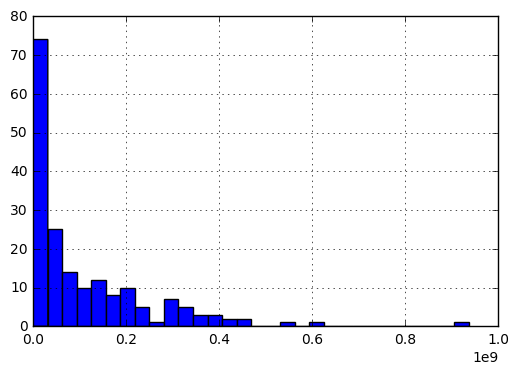

In [188]:
#To impute the missing value we need to determine the correct strategy.
df['Gross'].hist(bins=30)

In [249]:
#Impute the missing values. Determined Median was the best selector gross to mitigate the impact of outliers.
wdf['Gross'].fillna(wdf['Gross'].median, inplace=True)

In [250]:
wdf['Gross'].median

<bound method Series.median of 0       13092000.0
1         269061.0
2      242374454.0
3       27200000.0
4      623279547.0
5      183635922.0
6          89594.0
7              NaN
8              NaN
9      380838870.0
10         10177.0
11     289907418.0
12      26903709.0
13     100422786.0
14             NaN
15      32519322.0
16             NaN
17      56882000.0
18       5501940.0
19     138339411.0
20        850043.0
21             NaN
22      44988180.0
23       4710455.0
24             NaN
25      64604977.0
26       6523137.0
27             NaN
28     170708996.0
29       5400000.0
          ...     
220            NaN
221            NaN
222     46357676.0
223            NaN
224    329691196.0
225     57598247.0
226    260000000.0
227    130058047.0
228     60962878.0
229            NaN
230     39200000.0
231            NaN
232    292568851.0
233            NaN
234            NaN
235    460935665.0
236    204843350.0
237        50690.0
238     23472900.0
239    198655278.0


In [231]:
wdf["Gross"].isnull().index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            240, 241, 242, 243, 244, 245, 246, 247, 248, 249],
           dtype='int64', length=250)

In [259]:
im = Imputer(strategy='median', axis=0)
im.fit(wdf["Gross"].reshape(-1,1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [262]:
wdf["Gross"]=im.transform(wdf["Gross"].reshape(-1,1))

In [270]:
wdf['Gross'].isnull().sum()

0

In [271]:
#There's 81 missing metascore values. Dropping the column. 
del wdf['Metascore']

KeyError: 'Metascore'

In [272]:
#Ensure there are no remaining NaN. 
pd.isnull(wdf).sum() > 0

Runtime                       False
Year                          False
imdbRating                    False
imdbVotes                     False
Gross                         False
actor: al pacino              False
actor: alec guinness          False
actor: ben kingsley           False
actor: brad pitt              False
actor: bruce willis           False
actor: carrie fisher          False
actor: charles chaplin        False
actor: christian bale         False
actor: clint eastwood         False
actor: gunnar björnstrand     False
actor: harrison ford          False
actor: humphrey bogart        False
actor: jack hawkins           False
actor: jack nicholson         False
actor: james stewart          False
actor: joe pesci              False
actor: leonardo dicaprio      False
actor: mark hamill            False
actor: mark ruffalo           False
actor: marlon brando          False
actor: matt damon             False
actor: michael caine          False
actor: morgan freeman       

# Model Development

This section where we build each model and test it looking at MSE and R2 (more on that in the conclusion.)

The models tested are: 

Random Forest Regressor

Ada Boost Regressor (base Decision Tree Regressor)

Gradient Boosting Regressor

Extra Trees Regressor

In [273]:
# Define the x and y variables
features = [c for c in wdf.columns if c != 'imdbRating']

X = wdf[features]
y = wdf['imdbRating']

### Random Forest Regressor

In [315]:
#Use recursive feature eleminination to determine the best features to consider.
estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
rfecv_columns = X.columns[selector.support_]
rfecv_columns

Index([               u'Runtime',                   u'Year',
                    u'imdbVotes',                  u'Gross',
                 u'genre_action',        u'genre_adventure',
              u'genre_animation',           u'genre_comedy',
                  u'genre_crime',            u'genre_drama',
                u'genre_mystery',          u'genre_romance',
                    u'genre_sci',         u'genre_thriller',
                    u'genre_war',          u'genre_western',
       u'director: billy wilder',        u'country_germany',
                u'country_italy',             u'country_uk',
                  u'country_usa',     u'writer_ paulo lins',
             u'writer_ story by',              u'month_3.0',
                    u'month_6.0',              u'month_7.0',
                    u'month_8.0',              u'month_9.0',
                   u'month_11.0',            u'month_PG-13'],
      dtype='object')

In [326]:
#Generate a limited dataframe of just the features from recursive feature elemination. 
rfr = wdf[rfecv_columns]

In [327]:
X_train, X_test, y_train, y_test = train_test_split(rfc, y, test_size=0.3, random_state=42)

(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)[source]¶

In [329]:
rfr = RandomForestRegressor() 

param_grid = { 
    'n_estimators': [100,200,300,400],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)
print CV_rfc.best_params_


{'max_features': 'auto', 'n_estimators': 200}


In [330]:
rfr_best = RandomForestRegressor(n_estimators=200)
rfr_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [331]:
mse = mean_squared_error(y_test, rfr_best.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.0210


In [349]:
y_true = y_test
y_pred = rfr_best.predict(X_test)

rfr_r2 = r2_score(y_true, y_pred)
rfr_r2

0.46141057481500614

### Ada Boost Regressor

All of the variables will be denoted with 'ada' or '2' to distinguish them. Since the base estimator is defaulted to a DecisionTreeRegressor, we won't produce an output for the DecisionTreeRegressor seperately. 

In [317]:
estimator2 = AdaBoostRegressor()
selector2 = RFECV(estimator2, step=1, cv=5)
selector2 = selector2.fit(X, y)
rfecv_columns2 = X.columns[selector2.support_]
rfecv_columns2

Index([             u'Runtime',                 u'Year',
                  u'imdbVotes',                u'Gross',
           u'actor: al pacino',     u'actor: al pacino',
       u'actor: alec guinness', u'actor: alec guinness',
        u'actor: ben kingsley',  u'actor: ben kingsley',
       ...
                 u'month_11.0',           u'month_12.0',
                    u'month_G',              u'month_M',
            u'month_NOT RATED',         u'month_PASSED',
                   u'month_PG',          u'month_PG-13',
                    u'month_R',        u'month_UNRATED'],
      dtype='object', length=1053)

In [321]:
# Generate a dataframe with the correct columns.
adadf = wdf[rfecv_columns2]

In [324]:
# Complete a Train/Test split.

X_train2, X_test2, y_train2, y_test2 = train_test_split(adadf, y, test_size=0.3, random_state=42)


(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)

In [325]:
ada = AdaBoostRegressor() 

param_grid2 = { 
    'n_estimators': [5,50,100,200,300],
    'learning_rate': [0.5, 1.0, 1.5]
}

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid2, cv= 5)
CV_ada.fit(X_train2, y_train2)
print CV_ada.best_params_


{'n_estimators': 100, 'learning_rate': 1.5}


In [335]:
ada_best = AdaBoostRegressor(n_estimators=100, learning_rate=1.5)
ada_best.fit(X_train2, y_train2)

AdaBoostRegressor(base_estimator=None, learning_rate=1.5, loss='linear',
         n_estimators=100, random_state=None)

In [336]:
mse = mean_squared_error(y_test2, ada_best.predict(X_test2))
print("MSE: %.4f" % mse)

MSE: 0.0271


In [337]:
y_true = y_test2
y_pred = ada_best.predict(X_test2)

ada_r2 = r2_score(y_true, y_pred)
ada_r2

0.30464399301194267

### Gradient Boosting Regressor

Variables relating to the Gradient Boosting Regressor will be marked either 'gbr' or '3'.

In [343]:
#Run recursive feature elimination for the GBR.
estimator3 = GradientBoostingRegressor()
selector3 = RFECV(estimator3, step=1, cv=5)
selector3 = selector3.fit(X, y)
rfecv_columns3 = X.columns[selector3.support_]
rfecv_columns3

Index([                u'Runtime',                    u'Year',
                     u'imdbVotes',                   u'Gross',
       u'director: william wyler',      u'writer_ based upon',
              u'writer_ story by', u'writer_ vincenzo cerami'],
      dtype='object')

In [344]:
# Generate a dataframe with the correct columns.
gbrdf = wdf[rfecv_columns3]

In [350]:
# Complete a Train/Test split.

X_train3, X_test3, y_train3, y_test3 = train_test_split(gbrdf, y, test_size=0.3, random_state=42)


GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_split=1e-07, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')[source]¶

In [353]:
gbr = GradientBoostingRegressor() 

param_grid3 = { 
    'n_estimators': [5,50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'learning_rate': [0.1, 0.5, 1.0, 1.5]
}

CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid3, cv= 5)
CV_gbr.fit(X_train3, y_train3)
print CV_gbr.best_params_

{'max_features': 'sqrt', 'n_estimators': 200, 'learning_rate': 0.1}


In [359]:
gbr_best = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_features ='sqrt')
gbr_best.fit(X_train3, y_train3)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features='sqrt', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [360]:
mse = mean_squared_error(y_test3, gbr_best.predict(X_test3))
print("MSE: %.4f" % mse)

MSE: 0.0226


In [361]:
y_true = y_test3
y_pred = gbr_best.predict(X_test3)

ada_r2 = r2_score(y_true, y_pred)
ada_r2

0.420214949962187

### Extra Trees Regression

Variables relating to the Extra Trees Regressor will be marked either 'etr' or '4'.

In [346]:
estimator4 = ExtraTreesRegressor()
selector4 = RFECV(estimator4, step=1, cv=5)
selector4 = selector4.fit(X, y)
rfecv_columns4 = X.columns[selector4.support_]
rfecv_columns4

Index([            u'Runtime',                u'Year',           u'imdbVotes',
                     u'Gross',         u'genre_drama',         u'country_usa',
        u'writer_ mario puzo', u'writer_ mickey knox'],
      dtype='object')

In [357]:
# Generate a dataframe with the correct columns.
etrdf = wdf[rfecv_columns4]

In [358]:
# Complete a Train/Test split.

X_train4, X_test4, y_train4, y_test4 = train_test_split(etrdf, y, test_size=0.3, random_state=42)

ExtraTreesRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=False, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

In [364]:
etr = ExtraTreesRegressor() 

param_grid4 = { 
    'n_estimators': [5,50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': ['True','False']
}

CV_etr = GridSearchCV(estimator=etr, param_grid=param_grid4, cv= 5)
CV_etr.fit(X_train4, y_train4)
print CV_etr.best_params_

{'max_features': 'auto', 'n_estimators': 100, 'bootstrap': 'False'}


In [365]:
etr_best = ExtraTreesRegressor(n_estimators=100, max_features ='auto')
etr_best.fit(X_train4, y_train4)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [366]:
mse = mean_squared_error(y_test4, etr_best.predict(X_test4))
print("MSE: %.4f" % mse)

MSE: 0.0189


In [367]:
y_true = y_test4
y_pred = etr_best.predict(X_test4)

etr_r2 = r2_score(y_true, y_pred)
etr_r2

0.51408673609208155

In [ ]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Conclusion

First off...Let's address the elephant in the room. I thought I had read in the readme that we should consider this a regression problem and not classification problem. I see now that it didn't specify either way, and since the goal is to determine which features most impact the rating, both Regression and Classification should produce the same result. 
I would argue even that Regression would produce a more accurate result. Since we're using trees based models, if you were to make large bins for the rating score it could produce a feature which defined the split well but didn't actually account for much of explainination in an increase in the rating. A countinuous target variable (regression) would have solved a lot of this problem and therefore is perhaps the more appropriate choice. 

For our scoring metric we primarily looked at the MSE to judge how well the model performed. The R2 was also included as a measure of how well the model was explaining the increasing in rating but was not the primary measure. 

The Extra Trees Model performed best in both measures with an MSE of 0.019 and an R2 of 0.51. This is an expected outcome because Extra Trees performs well in many senarios. The extra randomness produces a result where the errors are less correlated with eachother. (http://www.montefiore.ulg.ac.be/~ernst/uploads/news/id63/extremely-randomized-trees.pdf)

Finally, below we call the feature importance method on our model to determine which features have the largest impact. Since this is a tree-based model we won't have coefficients but we do get the feature importance score, which, is (per the documentation) the "[...] (normalized) total reduction of the criterion brought by that feature. "

In [371]:
feature_importances = pd.DataFrame(etr_best.feature_importances_,
                                   index = etrdf.columns,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(20)

,importance
imdbVotes,0.514188
Year,0.133010
Runtime,0.092335
writer_ mario puzo,0.077557
Gross,0.073949
genre_drama,0.045207
writer_ mickey knox,0.037617
country_usa,0.026137


### Student Hat

As some possible next steps, I'd like to be able to call the AdaBoost model with ExtraTrees as my base model. Additionally, the recursive feature importance for the ExtraTrees model identified only 8 features as the optimal set. I'd really like to be able to try and add back some of the features to see if we get a better result. Additionally, I'd like to look at the adjusted R2 value to really maximize the benefit of use calling the RFECV for each of the models.